<a href="https://colab.research.google.com/github/XineohpM/Computational_Physics_PHYS_411/blob/main/PHYS_411_HW3_Xiaoyue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Exercise 6.5

**(a)** According to Kirchhoff's Law, all currents going in and out of a node sum to $0$.

**For node $1$:**
$$\begin{gathered}\frac{V_{1}-V_{+}}{R_{1}} +\frac{\text{d} }{\text{d} t} C_{1}(V_{1}-V_{2})+\frac{V_{1}}{R_{4}} =0\\ V_{1}\left( \frac{1}{R_{1}} +\frac{1}{R_{4}} \right)  -\frac{V_{+}}{R_{1}} +C_{1}\frac{\text{d} }{\text{d} t} (V_{1}-V_{2})=0\\ \end{gathered} $$
. Since $V_{1}=x_{1}e^{i\omega t}\text{,} \  V_{2}=x_{2}e^{i\omega t}$,
$$\begin{gathered}x_{1}e^{i\omega t}\left( \frac{1}{R_{1}} +\frac{1}{R_{4}} \right)  +i\omega C_{1}(x_{1}-x_{2})e^{i\omega t}-\frac{x_{+}}{R_{1}} e^{i\omega t}=0\\ \left( \frac{1}{R_{1}} +\frac{1}{R_{4}} +i\omega C_{1}\right)  x_{1}-i\omega C_{1}x_{2}=\frac{x_{+}}{R_{1}} \end{gathered} $$.

**For node $2$:**
$$\frac{V_{2}-V_{+}}{R_{2}} +\frac{V_{2}}{R_{5}} +\frac{\text{d} }{\text{d} t} C_{1}\left( V_{2}-V_{1}\right)  +\frac{\text{d} }{\text{d} t} C_{2}\left( V_{2}-V_{3}\right)  =0$$
. Since  $V_{1}=x_{1}e^{i\omega t}\text{,} \  V_{2}=x_{2}e^{i\omega t}\text{,} \  V_{3}=x_{3}e^{i\omega t}$,
$$-i\omega C_{1}x_{1}+\left( \frac{1}{R_{2}} +\frac{1}{R_{5}} +i\omega C_{1}+i\omega C_{2}\right)  x_{2}-i\omega C_{2}x_{3}=\frac{x_{+}}{R_{2}} $$.

**For node $3$:**
$$\frac{V_{3}-V_{+}}{R_{3}} +\frac{\text{d} }{\text{d} t} C_{2}\left( V_{3}-V_{2}\right)  +\frac{V_{3}}{R_{6}} =0$$
. Since  $V_{2}=x_{2}e^{i\omega t}\text{,} \  V_{3}=x_{3}e^{i\omega t}$,
$$-i\omega C_{2}x_{2}+\left( \frac{1}{R_{3}} +\frac{1}{R_{6}} +i\omega C_{2}\right)  x_{3}=\frac{x_{+}}{R_{3}} $$.

**(b)**

In [6]:
import numpy as np
import cmath

R_1 = 1e3 # Ohm
R_2 = 2e3
R_3 = 1e3
R_4 = 2e3
R_5 = 1e3
R_6 = 2e3
C_1 = 1e-6 # F
C_2 = 0.5e-6
x_plus = 3 # V
omega = 1e3 # s^-1

def gaussian_elimination(A, b):
    augmented_matrix = np.hstack([A, b.reshape(-1, 1)])
    n = len(b)

    for i in range(n):
        max_row = np.argmax(abs(augmented_matrix[i:, i])) + i
        augmented_matrix[[i, max_row]] = augmented_matrix[[max_row, i]]

        augmented_matrix[i] = augmented_matrix[i] / augmented_matrix[i, i]

        for j in range(n):
            if j != i:
                augmented_matrix[j] = augmented_matrix[j] - augmented_matrix[j, i] * augmented_matrix[i]

    return augmented_matrix[:, -1]

A = np.zeros((3, 3), dtype = complex)
A[0, 0] = (1 / R_1) + (1 / R_4) + (1j * omega * C_1)
A[0, 1] = -1j * omega * C_1
A[1, 0] = -1j * omega * C_1
A[1, 1] = (1 / R_2) + (1 / R_5) + (1j * omega * C_1) + (1j * omega * C_2)
A[1, 2] = -1j * omega * C_2
A[2, 1] = -1j * omega * C_2
A[2, 2] = (1 / R_3) + (1 / R_6) + (1j * omega * C_2)

b = np.array([x_plus / R_1, x_plus / R_2, x_plus / R_3],  dtype = complex)

x = gaussian_elimination(A, b)
x_1_mod, x_1_phase = cmath.polar(x[0])
print("The modulus of x_1 is:", x_1_mod, ", the phase of x_1 is:", x_1_phase)
x_2_mod, x_2_phase = cmath.polar(x[1])
print("The modulus of x_2 is:", x_2_mod, ", the phase of x_2 is:", x_2_phase)
x_3_mod, x_3_phase = cmath.polar(x[2])
print("The modulus of x_3 is:", x_3_mod, ", the phase of x_3 is:", x_3_phase)

The modulus of x_1 is: 1.7014390658777336 , the phase of x_1 is: -0.09545371433271428
The modulus of x_2 is: 1.4806053465364062 , the phase of x_2 is: 0.20216879328855675
The modulus of x_3 is: 1.8607693200562132 , the phase of x_3 is: -0.07268725004282395


## 2. Exercise 6.9

**(a)**
$$\begin{gathered}\hat{H} \psi =E\psi \\ \hat{H} \sum^{\infty }_{n=1} \psi_{n} \sin \frac{\pi nx}{L} =E\sum^{\infty }_{n=1} \psi_{n} \sin \frac{\pi nx}{L} \\ \hat{H} \sum^{\infty }_{n=1} \psi_{n} \sin \frac{\pi nx}{L} \sin \frac{\pi mx}{L} =E\sum^{\infty }_{n=1} \psi_{n} \sin \frac{\pi nx}{L} \sin \frac{\pi mx}{L} \\ \int^{L}_{0} \hat{H} \sum^{\infty }_{n=1} \psi_{n} \sin \frac{\pi nx}{L} \sin \frac{\pi mx}{L} \text{d} x=\int^{L}_{0} E\sum^{\infty }_{n=1} \psi_{n} \sin \frac{\pi nx}{L} \sin \frac{\pi mx}{L} \text{d} x\end{gathered} $$

Rearrange the above equation, one can get
$$\sum^{\infty }_{n=1} \psi_{n} \int^{L}_{0} \sin \frac{\pi nx}{L} \hat{H} \sin \frac{\pi mx}{L} \text{d} x=\sum^{\infty }_{n=1} \int^{L}_{0} E\psi_{n} \sin \frac{\pi nx}{L} \sin \frac{\pi mx}{L} \text{d} x=\frac{1}{2} LE\psi_{m} $$.

Then one can define the matrix $\mathbf{H}$ as
$$\mathbf{H_{mn}}=\frac{2}{L} \int^{L}_{0} \sin \frac{\pi mx}{L} \left[ -\frac{\hslash^{2} }{2M} \frac{\text{d}^{2} }{\text{d} x^{2}} +V(x)\right]  \sin \frac{\pi nx}{L} \text{d} x$$.

**(b)**
$$\begin{gathered}\mathbf{H_{mn}}=\frac{2}{L} \int^{L}_{0} \sin \frac{\pi mx}{L} \left( -\frac{\hslash^{2} }{2M} \frac{\text{d}^{2} }{\text{d} x^{2}} +\frac{ax}{L} \right)  \sin \frac{\pi nx}{L} \text{d} x\\ =\frac{\hslash^{2} \pi^{2} n^{2}}{ML^{3}} \int^{L}_{0} \sin \frac{\pi mx}{L} \sin \frac{\pi nx}{L} \text{d} x+\frac{2a}{L^{2}} \int^{L}_{0} x\sin \frac{\pi mx}{L} \sin \frac{\pi nx}{L} \text{d} x\\ =\begin{cases}0,&\text{if} \  m\neq n,\  \text{and} \  m,n\  \text{are both even or odd} \\ -\frac{8a}{\pi^{2} } \frac{mn}{\left( m^{2}-n^{2}\right)^{2}  } ,&\text{if} \  m\neq n,\  \text{and one is even, one is odd} \\ \frac{\hslash^{2} \pi^{2} n^{2}}{2ML^{2}} +\frac{a}{2} ,&\text{if} \  m=n\end{cases} \\ =\mathbf{H_{nm}}\end{gathered} $$

Since $\mathbf{H_{mn}}=\mathbf{H_{nm}}$ for all $m$ and $n$, the matrix is symmetric. Since all components of the matrix is real, the matrix itself is real.


In [12]:
import numpy as np


M = 9.1094e-31 # kg
q = 1.6022e-19 # C
a = 1.6022e-18 # J
L = 5.0e-10 # m
h_bar = 1.054e-34 # J * s

def H_mn(m, n):
    if (m != n) and (m % 2 == n % 2):
        return 0
    elif (m != n) and (m % 2 != n % 2):
        return (-8 * a / (np.pi ** 2)) * (m * n / ((m ** 2 - n ** 2) ** 2))
    else:
        return ((h_bar ** 2) * (np.pi ** 2) * (n ** 2) / (2 * M * (L ** 2))) + (a / 2)

**(c)**

In [13]:
import numpy as np


M = 9.1094e-31 # kg
q = 1.6022e-19 # C
a = 1.6022e-18 # J
L = 5.0e-10 # m
h_bar = 1.054e-34 # J * s

def H_mn(m, n):
    if (m != n) and (m % 2 == n % 2):
        return 0
    elif (m != n) and (m % 2 != n % 2):
        return (-8 * a / (np.pi ** 2)) * (m * n / ((m ** 2 - n ** 2) ** 2))
    else:
        return ((h_bar ** 2) * (np.pi ** 2) * (n ** 2) / (2 * M * (L ** 2))) + (a / 2)

N = 10
H = np.zeros((N, N))

for n in range(N):
    for m in range(N):
        H[n, m] = H_mn(m + 1, n + 1)

x = np.linalg.eigvalsh(H)

conversion = 1.60218e-19
for i in range(len(x)):
    converted = x[i] / conversion
    print("n =", i + 1, ", eigenvalue:", converted, "eV")

n = 1 , eigenvalue: 5.834155593265074 eV
n = 2 , eigenvalue: 11.174700764284841 eV
n = 3 , eigenvalue: 18.6483602253084 eV
n = 4 , eigenvalue: 29.11816231893028 eV
n = 5 , eigenvalue: 42.61428146659945 eV
n = 6 , eigenvalue: 59.126445478477564 eV
n = 7 , eigenvalue: 78.64926210299737 eV
n = 8 , eigenvalue: 101.1808311535433 eV
n = 9 , eigenvalue: 126.71890758843688 eV
n = 10 , eigenvalue: 155.39189491148448 eV


**(d)**

In [15]:
import numpy as np


M = 9.1094e-31 # kg
q = 1.6022e-19 # C
a = 1.6022e-18 # J
L = 5.0e-10 # m
h_bar = 1.054e-34 # J * s

def H_mn(m, n):
    if (m != n) and (m % 2 == n % 2):
        return 0
    elif (m != n) and (m % 2 != n % 2):
        return (-8 * a / (np.pi ** 2)) * (m * n / ((m ** 2 - n ** 2) ** 2))
    else:
        return ((h_bar ** 2) * (np.pi ** 2) * (n ** 2) / (2 * M * (L ** 2))) + (a / 2)

N = 100
H = np.zeros((N, N))

for n in range(N):
    for m in range(N):
        H[n, m] = H_mn(m + 1, n + 1)

x = np.linalg.eigvalsh(H)

conversion = 1.60218e-19
for i in range(10):
    converted = x[i] / conversion
    print("n =", i + 1, ", eigenvalue:", converted, "eV")

n = 1 , eigenvalue: 5.834155191673028 eV
n = 2 , eigenvalue: 11.17469943947666 eV
n = 3 , eigenvalue: 18.648358352014966 eV
n = 4 , eigenvalue: 29.118153509163907 eV
n = 5 , eigenvalue: 42.61427233547955 eV
n = 6 , eigenvalue: 59.12639283438576 eV
n = 7 , eigenvalue: 78.64921020993076 eV
n = 8 , eigenvalue: 101.18019946665396 eV
n = 9 , eigenvalue: 126.71807372815658 eV
n = 10 , eigenvalue: 155.26212868342614 eV


When $N=100$, the calculated eigenvalues are more accurate (closed to the actual value) than the calculated eigenvalues when $N=10$.

**(e)**

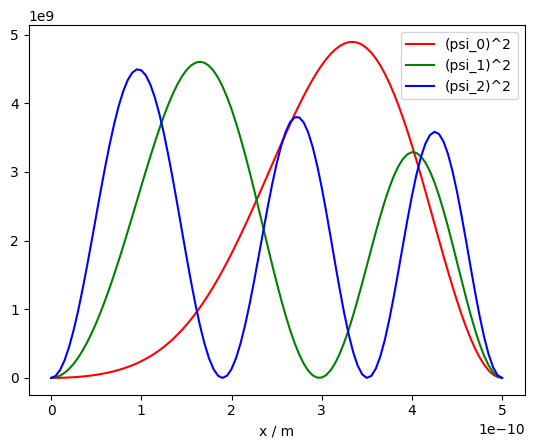

The squares of the wavefunctions are normalized.


In [27]:
import matplotlib.pyplot as plt


N = 100
E, psi = np.linalg.eigh(H)

def V(x):
    return a * x / L

def psi_n(n, x):
    psi_0 = 0
    for m in range(N):
        psi_0 += np.sqrt(2 / L) * psi[n][m] * np.sin(np.pi * (m + 1) * x / L)
    return psi_0

x = np.linspace(0, L, N + 1)
v = [V(x_i) for x_i in x]
psi_0 = np.array([psi_n(0, x_i) for x_i in x])
psi_1 = np.array([psi_n(1, x_i) for x_i in x])
psi_2 = np.array([psi_n(2, x_i) for x_i in x])
psi0_squared = [(psi ** 2) for psi in psi_0]
psi1_squared = [(psi ** 2) for psi in psi_1]
psi2_squared = [(psi ** 2) for psi in psi_2]

plt.plot(x, psi0_squared, 'r', label = "(psi_0)^2")
plt.plot(x, psi1_squared, 'g', label = "(psi_1)^2")
plt.plot(x, psi2_squared, 'b', label = "(psi_2)^2")
plt.xlabel('x / m')
plt.legend()
plt.show()

# Check the normalization
tol = 1e-6

def simpson_rule(y, h):
    n = len(y)
    if n % 2 == 0:
        return None

    result = y[0] + y[n - 1] + 4 * sum(y[1: n - 1: 2]) + 2 * sum(y[2: n - 2: 2])
    result *= h / 3
    return result

integral_psi0 = simpson_rule(psi0_squared, x[1] - x[0])
integral_psi1 = simpson_rule(psi1_squared, x[1] - x[0])
integral_psi2 = simpson_rule(psi2_squared, x[1] - x[0])

if (1 - integral_psi0 < tol) and (1 - integral_psi1 < tol) and (1 - integral_psi2 < tol):
    print("The squares of the wavefunctions are normalized.")
elif 1 - integral_psi0 >= tol:
    print("The square of psi_0 is not normalized.")
elif 1 - integral_psi1 >= tol:
    print("The square of psi_1 is not normalized.")
elif 1 - integral_psi2 >= tol:
    print("The square of psi_2 is not normalized.")

## 3. Exercise 6.10

**(a)**

In [76]:
import numpy as np


tol = 1e-6

def g(c):
    iterations = 1
    def f(x):
        return 1 - np.exp(- c * x)

    def diff_f(x):
        dx = 1e-8
        return (f(x + dx) - f(x - dx)) / (2 * dx)

    def error(x_1, x_2):
        if np.abs(c * f(x_1)) < 1e-10:
            return 0
        return (x_1 - x_2) / (1 - 1 / diff_f(x_1))

    x_1 = 0.5
    x_2 = f(x_1)
    while(abs(error(x_1, x_2)) > tol):
        x_1 = x_2
        x_2 = f(x_2)
        iterations += 1
    return x_2

print("The approximated value of x when c = 2 is:", g(2))

The approximated value of x when c = 2 is: 0.7968113781935964


**(b)**

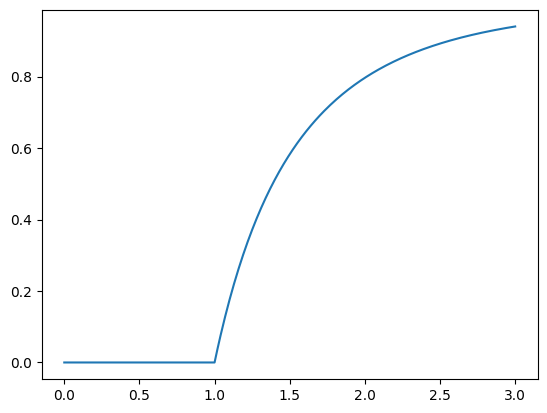

In [77]:
import matplotlib.pyplot as plt


pts = int((3 - 0) / 0.01) + 1
c = np.linspace(0, 3, pts)
x = [g(c_i) for c_i in c]

plt.plot(c, x)

## 4. Exercise 6.11

**(a)**
$$\begin{gathered}\epsilon^{\prime } =\epsilon \left[ \left( 1+\omega \right)  f^{\prime }(x^{\ast })-\omega \right]  \\ x^{\ast }=x+\epsilon =x+\frac{\epsilon^{\prime } }{\left( 1+\omega \right)  f^{\prime }(x^{\ast })-\omega } =x^{\prime }+\epsilon^{\prime } \\ \epsilon^{\prime } =\frac{x-x^{\prime }}{1-\frac{1}{\left( 1+\omega \right)  f^{\prime }(x^{\ast })-\omega } } \approx \frac{x-x^{\prime }}{1-\frac{1}{\left( 1+\omega \right)  f^{\prime }(x)-\omega } } \end{gathered} $$

**(b)**

In [75]:
import numpy as np


tol = 1e-6

def g(c):
    iterations = 1
    def f(x):
        return 1 - np.exp(- c * x)

    def diff_f(x):
        dx = 1e-8
        return (f(x + dx) - f(x - dx)) / (2 * dx)

    def error(x_1, x_2):
        if np.abs(c * f(x_1)) < 1e-10:
            return 0
        return (x_1 - x_2) / (1 - 1 / diff_f(x_1))

    x_1 = 0.5
    x_2 = f(x_1)
    while(abs(error(x_1, x_2)) > tol):
        x_1 = x_2
        x_2 = f(x_2)
        iterations += 1
    return x_2, iterations

result, iteration = g(2)
print("The approximated value of x when c = 2 is:", result, "with", iteration, "iterations to converge to a solution accurate to 1e-6.")

The approximated value of x when c = 2 is: 0.7968113781935964 with 15 iterations to converge to a solution accurate to 1e-6.


**(c)**

In [74]:
import numpy as np


tol = 1e-6

def g(c, w):
    iterations = 1
    def f(x):
        return 1 - np.exp(- c * x)

    def diff_f(x):
        dx = 1e-8
        return (f(x + dx) - f(x - dx)) / (2 * dx)

    def error(x_1, x_2):
        if np.abs(c * f(x_1)) < 1e-10:
            return 0
        return (x_1 - x_2) / (1 - 1 / diff_f(x_1))

    x_1 = 0.5
    x_2 = f(x_1)
    while (abs(error(x_1, x_2)) > tol):
        x_1 = x_2
        x_2 = (1 + w) * f(x_2) - w * x_2
        iterations += 1
    return x_2, iterations

w = np.linspace(0.5, 1.5, 21)
results = [g(2, w_i) for w_i in w]
root, iteration = zip(*results)
min_iteration = iteration[0]
min_iteration_index = 0
for i in range(20):
    print("With w =", round(w[i], 2), "the approximated value of x is:", root[i], "with", iteration[i], "iterations.")
    if iteration[i] < min_iteration:
        min_iteration = iteration[i]
        min_iteration_index = i
print("The minimum number of iterations used is:", min_iteration, ", this appears when w =", round(w[min_iteration_index], 2))

With w = 0.5 the approximated value of x is: 0.7968120512819613 with 8 iterations.
With w = 0.55 the approximated value of x is: 0.796812119154019 with 8 iterations.
With w = 0.6 the approximated value of x is: 0.7968121174655806 with 7 iterations.
With w = 0.65 the approximated value of x is: 0.7968121222749276 with 6 iterations.
With w = 0.7 the approximated value of x is: 0.7968121227737799 with 5 iterations.
With w = 0.75 the approximated value of x is: 0.7968121049654615 with 6 iterations.
With w = 0.8 the approximated value of x is: 0.796812144682366 with 7 iterations.
With w = 0.85 the approximated value of x is: 0.7968121879348897 with 7 iterations.
With w = 0.9 the approximated value of x is: 0.796812210470139 with 7 iterations.
With w = 0.95 the approximated value of x is: 0.7968119450630142 with 7 iterations.
With w = 1.0 the approximated value of x is: 0.7968120791986897 with 9 iterations.
With w = 1.05 the approximated value of x is: 0.7968118866507535 with 9 iterations.
W

**(d)** Yes. This could be in cases where the function is periodic or has a symmetric structure such that overshooting the solution with negative $\omega$ actually brings the iteration closer to another equivalent solution.

## 5. Exercise 6.12

**(a)**
$$\begin{cases}-x+ay+x^{2}y=0&(1)\\ b-ay-x^{2}y=0&(2)\end{cases} $$
$(1)+(2)$, one can get
$$x=b$$.
Substitute the value of $x$ back into $(2)$, one can get
$$y=\frac{b}{a+b^{2}} $$.

**(b)**

In [85]:
import numpy as np

a = 1
b = 2
tol = 1e-6
max_iteration = 1000

def f_x(y, x):
    try:
        return y * (a + x ** 2)
    except OverflowError:
        return float('inf')

def f_y(y):
    try:
        return b / (a + y ** 2)
    except OverflowError:
        return float('inf')

def diff_x(y, x):
    dx = 1e-8
    try:
        return (f_x(y, x + dx) - f_x(y, x - dx)) / (2 * dx)
    except OverflowError:
        return float('inf')

def diff_y(y):
    dy = 1e-8
    try:
        return (f_y(y + dy) - f_y(y - dy)) / (2 * dy)
    except OverflowError:
        return float('inf')

def relaxation_method():
    x = 0.5
    y = 0.5

    for i in range(max_iteration):
        x_new = f_x(y, x)
        y_new = f_y(y)

        if np.abs(x_new) == float('inf') or np.abs(y_new) == float('inf'):
            print("Overflow occurred.")
            return None, i

        if np.abs(x - x_new) < tol and np.abs(y - y_new) < tol:
            print("The function has converged.")
            return (x_new, y_new), i

        x, y = x_new, y_new

    print("The function does not converge within the given times of iterations.")
    return None, max_iteration

result, num_iterations = relaxation_method()
print("The stationary point is:", result)
print("Number of iterations is:", num_iterations)


Overflow occurred.
The stationary point is: None
Number of iterations is: 12


**(c)**
$$x=\sqrt{\frac{b-ay}{y} } ,\  y=\frac{x}{a+x^{2}} $$

In [86]:
import numpy as np

a = 1
b = 2
tol = 1e-6
max_iteration = 1000

def f_x(y):
    try:
        return np.sqrt((b - a * y) / y)
    except OverflowError:
        return float('inf')

def f_y(x):
    try:
        return x / (a + (x ** 2))
    except OverflowError:
        return float('inf')

def diff_x(y):
    dy = 1e-8
    try:
        return (f_x(y + dy) - f_x(y - dy)) / (2 * dy)
    except OverflowError:
        return float('inf')

def diff_y(x):
    dx = 1e-8
    try:
        return (f_y(x + dx) - f_y(x - dx)) / (2 * dx)
    except OverflowError:
        return float('inf')

def relaxation_method():
    x = 0.5
    y = 0.5

    for i in range(max_iteration):
        x_new = f_x(y)
        y_new = f_y(x)

        if np.abs(x_new) == float('inf') or np.abs(y_new) == float('inf'):
            print("Overflow occurred.")
            return None, i

        if np.abs(x - x_new) < tol and np.abs(y - y_new) < tol:
            print("The function has converged.")
            return (x_new, y_new), i

        x, y = x_new, y_new

    print("The function does not converge within the given times of iterations.")
    return None, max_iteration

result, num_iterations = relaxation_method()
print("The stationary point is:", result)
print("Number of iterations is:", num_iterations)

The function has converged.
The stationary point is: (1.9999992539609281, 0.4)
Number of iterations is: 26


## 6. Exercise 6.16

**(a)**
$$\begin{gathered}F_{earth}=\frac{GMm_{sat}}{r^{2}} \\ F_{moon}=\frac{Gmm_{sat}}{(R-r)^{2}} \\ F_{centripetal}=m\omega^{2} r=F_{earth}-F_{moon}\\ \frac{GM}{r^{2}} -\frac{Gm}{(R-r)^{2}} =\omega^{2} r\end{gathered} $$

**(b)**

In [104]:
import numpy as np


G = 6.674e-11 # m^3 kg^-1 s^-2
M = 5.974e24 # kg
m = 7.348e22 # kg
R = 3.844e8 # m
omega = 2.662e-6 # s^-1
tol = 1e-6

def f(r):
    return (G * M / (r ** 2)) - (G * m / ((R - r) ** 2)) - (omega ** 2) * R

def diff(r):
    dr = 1e-8
    return (f(r + dr) - f(r - dr)) / (2 * dr)

def secant():
    r_i = 5.0e4
    r_i_new = 5.0e7
    r = r_i_new - f(r_i_new) * (r_i_new - r_i) / (f(r_i_new) - f(r_i))

    while np.abs(f(r)) > tol:
        r = r_i_new - f(r_i_new) * (r_i_new - r_i) / (f(r_i_new) - f(r_i))
        r_i = r_i_new
        r_i_new = r

    return r

print("The estimated value of r is:", secant(), "m")

The estimated value of r is: 319780776.37246037 m


## 7. Exercise 6.17

**(a)**
$$\frac{V_{2}-V_{+}}{R_{3}} +\frac{V_{2}}{R_{4}} -I_{0}\left( e^{\frac{V_{1}-V_{2}}{V_{T}} }-1\right)  =0$$

**(b)**

In [10]:
import numpy as np


V_plus = 5
V_T = 0.05
R_1 = 1e3
R_2 = 4e3
R_3 = 3e3
R_4 = 2e3
I_0 = 3e-9
tol = 1e-6

def f_1(V_1, V_2):
    return ((V_1 - V_plus) / R_1) + (V_1 / R_2) + I_0 * (np.exp((V_1 - V_2) / V_T) - 1)

def f_2(V_1, V_2):
    return ((V_2 - V_plus) / R_3) + (V_2 / R_4) - I_0 * (np.exp((V_1 - V_2) / V_T) - 1)

def diff_1_V_1(V_1, V_2):
    dV_1 = 1e-8
    return (f_1(V_1 + dV_1, V_2) - f_1(V_1 - dV_1, V_2)) / (2 * dV_1)

def diff_1_V_2(V_1, V_2):
    dV_2 = 1e-8
    return (f_1(V_1, V_2 + dV_2) - f_1(V_1, V_2 - dV_2)) / (2 * dV_2)

def diff_2_V_1(V_1, V_2):
    dV_1 = 1e-8
    return (f_2(V_1 + dV_1, V_2) - f_2(V_1 - dV_1, V_2)) / (2 * dV_1)

def diff_2_V_2(V_1, V_2):
    dV_2 = 1e-8
    return (f_2(V_1, V_2 + dV_2) - f_2(V_1, V_2 - dV_2)) / (2 * dV_2)

def Jacobian(V_1, V_2):
    jacobian = np.zeros((2, 2))
    jacobian[0, 0] = diff_1_V_1(V_1, V_2)
    jacobian[0, 1] = diff_1_V_2(V_1, V_2)
    jacobian[1, 0] = diff_2_V_1(V_1, V_2)
    jacobian[1, 1] = diff_2_V_2(V_1, V_2)
    return jacobian

def inverse(J):
    det = J[0, 0] * J[1, 1] - J[0, 1] * J[1, 0]
    if det == 0:
        raise ValueError("The matrix cannot be inverted.")

    inv_J = np.zeros_like(J)
    inv_J[0, 0], inv_J[1, 1] = J[1, 1], J[0, 0]
    inv_J[0, 1], inv_J[1, 0] = -J[0, 1], -J[1, 0]

    return inv_J / det

def norm(vec):
    return vec[0] ** 2 + vec[1] ** 2

def newton(f_1, f_2, jacobian, V_1, V_2):
    v_1, v_2 = V_1, V_2
    j_inv = inverse(Jacobian(v_1, v_2))
    F = np.array([f_1(v_1, v_2), f_2(v_1, v_2)])
    delta = j_inv @ F
    while norm(delta) > tol ** 2:
        j_inv = inverse(Jacobian(v_1, v_2))
        F = np.array([f_1(v_1, v_2), f_2(v_1, v_2)])
        delta = j_inv @ F
        v_1_new, v_2_new = np.array([v_1, v_2]) - delta
        v_1, v_2 = v_1_new, v_2_new
    return v_1, v_2

V_1, V_2 = newton(f_1, f_2, Jacobian(3, 2), 3, 2)
print("The estimated value of V_1 is:", V_1, ", the estimated value of V_2 is:", V_2)

The estimated value of V_1 is: 3.446954618858576 , the estimated value of V_2 is: 2.8295680717121363


**(c)**

In [15]:
error = 0.02
estimated_V = 0.6
delta_V = np.abs(V_1 - V_2)
if np.abs(delta_V - estimated_V) < error:
    print("The voltage across the diode is:", delta_V, "V, which obeys the electronic engineer's rule of thumb for diodes.")
else:
    print("The voltage across the diode is:", delta_V, "V, which does not obey the electronic engineer's rule of thumb for diodes.")

The voltage across the diode is: 0.6173865471464395 V, which obeys the electronic engineer's rule of thumb for diodes.


The voltage across the diode is: $0.6173865471464395\ \text{V}$, which obeys the electronic engineer's rule of thumb for diodes.

## 8. Exercise 6.18

**(a)**

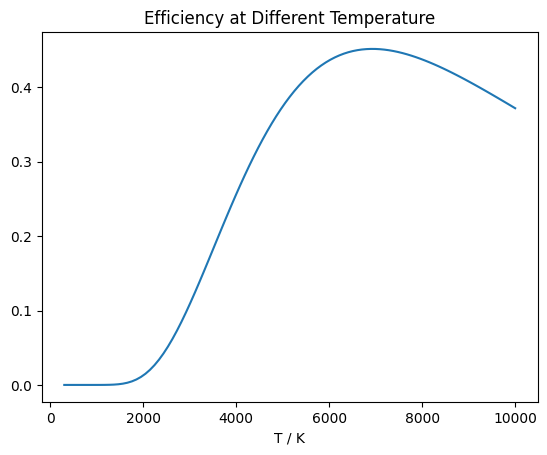

In [106]:
import numpy as np
import matplotlib.pyplot as plt



k = 1.380649e-23
h = 6.62607015e-34
c = 299792458
lambda_1 = 390e-9
lambda_2 = 750e-9

def gaussxw(N):
    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3, 4 * N - 1, N) / (4 * N + 2)
    x = np.cos(np.pi * a + 1/(8 * N * N * np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta > epsilon:
        p0 = np.ones(N, float)
        p1 = np.copy(x)
        for k in range(1, N):
            p0, p1 = p1, ((2 * k + 1) * x * p1 - k * p0) / (k + 1)
        dp = (N + 1) * (p0 - x * p1) / (1 - x * x)
        dx = p1 / dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2 * (N + 1) * (N + 1) / (N * N * (1 - x * x) * dp * dp)

    return x, w

def gaussxwab(N, a, b):
    x, w = gaussxw(N)
    return 0.5 * (b - a) * x + 0.5 * (b + a), 0.5 * (b - a) * w

def eta(T):
    b = h * c / (lambda_1 * k * T)
    a = h * c / (lambda_2 * k * T)

    def f(x):
        return (x ** 3) / (np.exp(x) - 1)

    x, w = gaussxwab(100, a, b)
    y = f(x)

    integral = 0
    for i in range(0, N):
        integral += w[i] * y[i]

    return integral * (15 / (np.pi ** 4))

T = np.linspace(300, 10000, 101)
efficiency = [eta(T_i) for T_i in T]

plt.plot(T, efficiency)
plt.title("Efficiency at Different Temperature")
plt.xlabel("T / K")
plt.show()

**(b)**

In [110]:
tol = 1

def golden_ratio(f, a, b):
    phi = (1 + np.sqrt(5)) / 2
    c = b - (b - a) / phi
    d = a + (b - a) / phi

    while abs(b - a) > tol:
        if f(c) > f(d):
            b = d
        else:
            a = c

        c = b - (b - a) / phi
        d = a + (b - a) / phi

    return (b + a) / 2

max_point = golden_ratio(eta, 300, 10000)
print("The maximum efficiency appears approximately at T =", max_point, "K")

The maximum efficiency appears approximately at T = 6928.506344246048 K


**(c)** No. The melting point of tungsten is $3695 \text{K}$, which is lower than the temperature with maximum efficiency ($6928.5 \text{K}$).